<a href="https://colab.research.google.com/github/TanishqThuse/Stock_Prediction/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#below are mathematical calculations library
import numpy as np
import pandas as pd

#importing yahoo finance stuff here
import yfinance as yf

#below are visualisation libraires
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
stocks = input("Enter the code of stock to download stock :- ")
data = yf.download(stocks, "2008-01-01","2024-05-05")
data.head()

Enter the code of stock to download stock :- GC=F


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-02,848.700012,857.799988,846.400024,857.000000,857.000000,130
2008-01-03,863.000000,865.500000,856.299988,866.400024,866.400024,181
2008-01-04,861.400024,865.500000,860.200012,863.099976,863.099976,28
2008-01-07,860.900024,860.900024,857.400024,859.599976,859.599976,4
2008-01-08,861.599976,879.400024,861.599976,878.000000,878.000000,21


In [ ]:
data.shape

(4111, 6)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4111 entries, 2008-01-02 to 2024-05-03
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       4111 non-null   float64
 1   High       4111 non-null   float64
 2   Low        4111 non-null   float64
 3   Close      4111 non-null   float64
 4   Adj Close  4111 non-null   float64
 5   Volume     4111 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 224.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,1429.553880,1437.009803,1421.635272,1429.385331,1429.385331,5356.264656
std,331.046121,332.393506,329.929947,331.163540,331.163540,28466.110130
min,705.000000,715.500000,681.000000,704.900024,704.900024,0.000000
25%,1211.500000,1217.350037,1205.149963,1211.250000,1211.250000,46.000000
50%,1328.900024,1335.900024,1323.000000,1328.400024,1328.400024,153.000000
75%,1726.000000,1734.099976,1717.150024,1725.149963,1725.149963,490.000000
max,2384.199951,2429.000000,2377.300049,2398.399902,2398.399902,386334.000000


Data description is done here

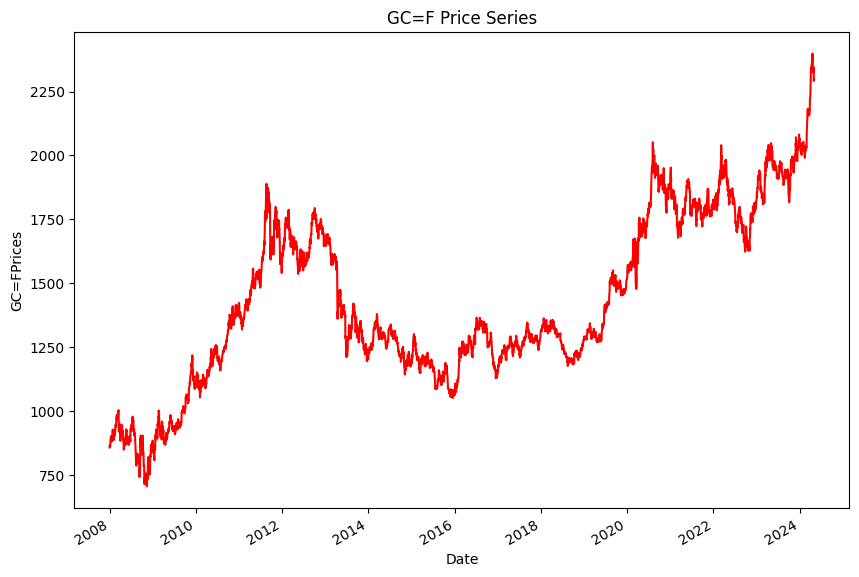

In [ ]:
data.Close.plot(figsize=(10,7), color='r')
plt.ylabel("{}Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

<ipython-input-13-efa29248b4a9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Close"])


<Axes: xlabel='Close', ylabel='Density'>

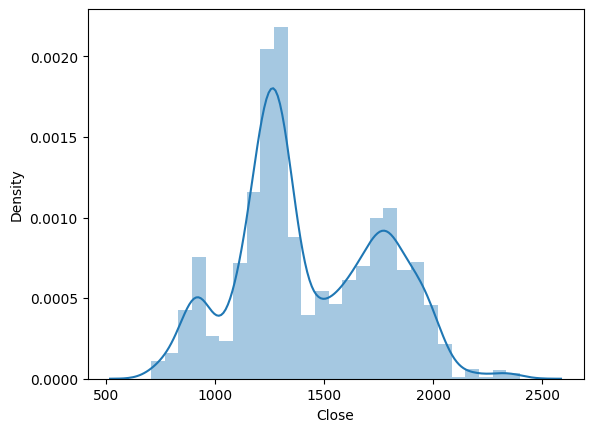

In [ ]:
sns.distplot(data["Close"])
# sns.displot(data["Close"])

<ipython-input-14-daae21fed2ea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["Open"])


<Axes: xlabel='Open', ylabel='Density'>

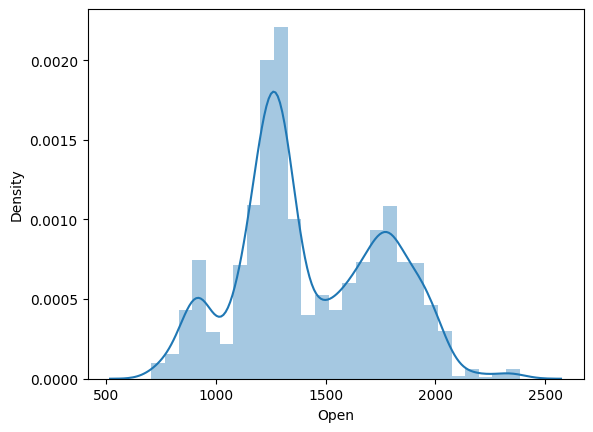

In [ ]:
sns.distplot(data["Open"])

<ipython-input-15-f105f0b633a7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["High"])


<Axes: xlabel='High', ylabel='Density'>

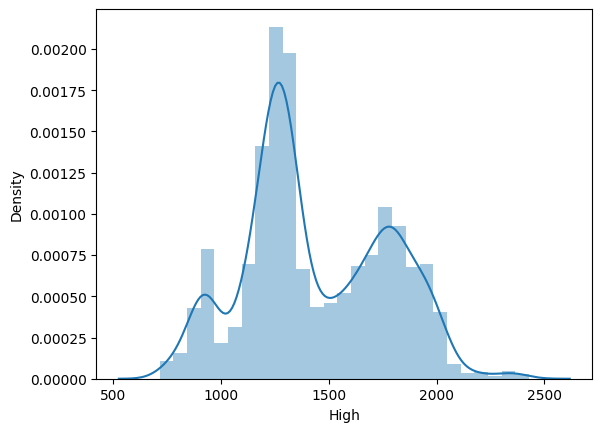

In [ ]:
 sns.distplot(data["High"])

Now we have done out data exploration and we will start training our model

In [ ]:
#Conclusion

# -> Shape of the data
# ->How our data is distributed
# ->It's very very non-linear
# ->Not gonna use linear regression since it is highly non - linear

#Studies uptil now -> Linear Regression, Logistic , SVM, Regularise

X = data.drop("Close", axis=1)
y = data["Close"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3288, 5)
(823, 5)
(3288,)
(823,)


below we are gonna check our predicted values

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # creating an instance of object
lr.fit(X_train, y_train)
pred1 = lr.predict(X_test)

In [ ]:
pred1

array([1719.09997559, 1250.30004883, 1298.90002441,  887.        ,
       1792.30004883, 1601.30004883, 1203.09997559, 1314.40002441,
       1730.59997559, 1791.19995117, 1919.5       , 1767.30004883,
       1994.19995117, 1784.        , 1257.40002441, 1057.30004883,
       1727.        , 1463.09997559, 1900.69995117,  888.70001221,
       1330.        , 1112.59997559, 1727.90002441, 1271.80004883,
       1284.69995117, 1690.40002441, 1117.80004883, 1060.09997559,
       1739.19995117, 1148.30004883, 1279.90002441, 1775.80004883,
       1737.80004883, 1225.69995117, 1999.40002441, 1328.19995117,
        926.59997559, 1736.19995117, 1532.09997559, 1615.59997559,
       2343.5       , 1859.90002441, 1290.19995117, 1324.69995117,
       1958.40002441, 1662.40002441, 1392.        , 1364.09997559,
       1825.69995117, 1423.80004883, 1336.40002441, 1908.69995117,
        869.59997559, 1235.69995117,  963.90002441, 1719.80004883,
       1203.09997559, 1053.40002441, 1335.80004883, 2236.5    

In [ ]:
#MSE --> Mean Squared Error
#RMSE --> Sqaure__root(MSE)
#r2_square ---> 1.0 # good model

# We are using a library method below from sklearn
#also we are creating a user defined method calculate_metrics
from sklearn.metrics import mean_squared_error, r2_score
def calculate_metrics(y_test, y_pred):
  # y_test is ground truth
  # y_pred is model predicted value
  mse = mean_squared_error(y_test, y_pred)
  rmse = np.sqrt(mse)
  r2_scors = r2_score(y_test, y_pred)

  print("MSE:- ", mse)
  print("RMSE:- ",rmse)
  print("R2 Score:- ",r2_scors)

calculate_metrics(y_test, pred1)

MSE:-  1.3706617687389068e-23
RMSE:-  3.702244952375392e-12
R2 Score:-  1.0


I saw in the youtube video he took a slightly older dataset. Our model is not good
MSE:-  1.3706617687389068e-23
RMSE:-  3.702244952375392e-12
R2 Score:-  1.0

I need to do some changes to make it good

of freecodecampt youtube video : MSE = 0.001, RMSE = 0.03 => which makes his model good as  values <1

Conclusion : This model was very good for learning purpose but needs many changes for making it better at predicting

In [35]:
from sklearn.linear_model import Lasso, Ridge

la = Lasso().fit(X_train, y_train)
ri = Ridge().fit(X_train, y_train)

la_p = la.predict(X_test)
ri_p = ri.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.066e+04, tolerance: 3.576e+04
  model = cd_fast.enet_coordinate_descent(


In [36]:
calculate_metrics(y_test, la_p)

MSE:-  21.903824384152742
RMSE:-  4.680152175320023
R2 Score:-  0.999806427226036


In [37]:
calculate_metrics(y_test, ri_p)

MSE:-  2.6390276231185386e-09
RMSE:-  5.137146701349436e-05
R2 Score:-  0.9999999999999767


In [ ]:
#we will use the other algorithm than this in our website using flask

from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr = SVR()

param_grid = {'C':[0.1, 1,10,100,1000],
              'gamma':[1,0.1,0.01,0.001,0.0001],
              'kernel': ['rbf']}

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.116 total time=   1.4s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.073 total time=   1.0s
[CV 3/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.086 total time=   0.8s
[CV 4/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.100 total time=   0.8s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.084 total time=   0.5s
[CV 1/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.116 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.073 total time=   0.4s
[CV 3/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.086 total time=   0.5s
[CV 4/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.100 total time=   0.5s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.084 total time=   0.5s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.115 total time=   0.5s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

In [ ]:
svr = SVR(C=10, gamma=0.01, kernel='rbf')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)

In [ ]:
import joblib

joblib.dumps(ri, 'model.pkl')
# model = joblib.load("model.pkl")
ridge_form_joblib = model = joblib.load("model.pkl")